# Lead Score - Case Study

## Problem Statement
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

 

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

 
### Data
You have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted. You can learn more about the dataset from the data dictionary provided in the zip folder at the end of the page. Another thing that you also need to check out are the levels present in the categorical variables. Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value (think why?).

 <br>
## Goals and Objectives
There are quite a few goals for this case study.
- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
- There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

## Results Expected
A well-commented Jupyter notebook with at least the logistic regression model, the conversion predictions and evaluation metrics.
The word document filled with solutions to all the problems.
The overall approach of the analysis in a presentation.
Mention the problem statement and the analysis approach briefly 
Explain the results in business terms
Include visualisations and summarise the most important results in the presentation
A brief summary report in 500 words explaining how you proceeded with the assignment and the learnings that you gathered.

In [186]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import confusion_matrix


# EDA

In [187]:
# Loading the data using Pandas
df = pd.read_csv('../lead_scoring_case_study_TA/Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [189]:
df.shape

(9240, 37)

In [190]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [191]:
# Normalized all string
df = df.applymap(lambda s:s.upper() if type(s) == str else s)

In [192]:
# As stated in the problem statement Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value
df = df.replace('SELECT',np.nan)

In [193]:
# Get all column that have more than 1 unique value
df= df.drop(df.columns[df.nunique() <= 1],axis=1)

In [194]:
# Drop all column that have more than 50% null
df = df.drop(df.columns[100*(df.isnull().sum()/len(df.index)) >= 50], axis = 1)



In [195]:
# Rechecking the percentage of missing values
100*(df.isnull().sum()/len(df.index))

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Newspaper Article                                 0.0000

In [196]:
# Clean up null value
df['Country'] = df['Country'].fillna('NA')
df['Specialization'] = df['Specialization'].fillna('NA') 
df['What is your current occupation'] = df['What is your current occupation'].fillna('NA')
df['What matters most to you in choosing a course'] = df['What matters most to you in choosing a course'].fillna('NA')
df['Tags'] = df['Tags'].fillna('NA') 
df['City'] = df['City'].fillna('NA') 
df['Asymmetrique Activity Index'] = df['Asymmetrique Activity Index'].fillna('NA') 
df['Asymmetrique Profile Index'] = df['Asymmetrique Profile Index'].fillna('NA') 
df['Asymmetrique Activity Score'] = df['Asymmetrique Activity Score'].fillna('NA') 
df['Asymmetrique Profile Score'] = df['Asymmetrique Profile Score'].fillna('NA') 

In [197]:
# Rechecking the percentage of missing values
100*(df.isnull().sum()/len(df.index))

Prospect ID                                      0.000000
Lead Number                                      0.000000
Lead Origin                                      0.000000
Lead Source                                      0.389610
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      1.482684
Total Time Spent on Website                      0.000000
Page Views Per Visit                             1.482684
Last Activity                                    1.114719
Country                                          0.000000
Specialization                                   0.000000
What is your current occupation                  0.000000
What matters most to you in choosing a course    0.000000
Search                                           0.000000
Newspaper Article                                0.000000
X Education Fo

In [198]:
# Only keep value for percentage null < 1
df = df[df.isnull().sum(axis=1) < 1]

In [199]:
# Rechecking the percentage of missing values
100*(df.isnull().sum()/len(df.index))

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                     

### Univariate Analysis

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 29 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9074 non-null   object 
 1   Lead Number                                    9074 non-null   int64  
 2   Lead Origin                                    9074 non-null   object 
 3   Lead Source                                    9074 non-null   object 
 4   Do Not Email                                   9074 non-null   object 
 5   Do Not Call                                    9074 non-null   object 
 6   Converted                                      9074 non-null   int64  
 7   TotalVisits                                    9074 non-null   float64
 8   Total Time Spent on Website                    9074 non-null   int64  
 9   Page Views Per Visit                           9074 

c:\Program Files\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Program Files\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Program Files\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Program Files\Anaconda\li

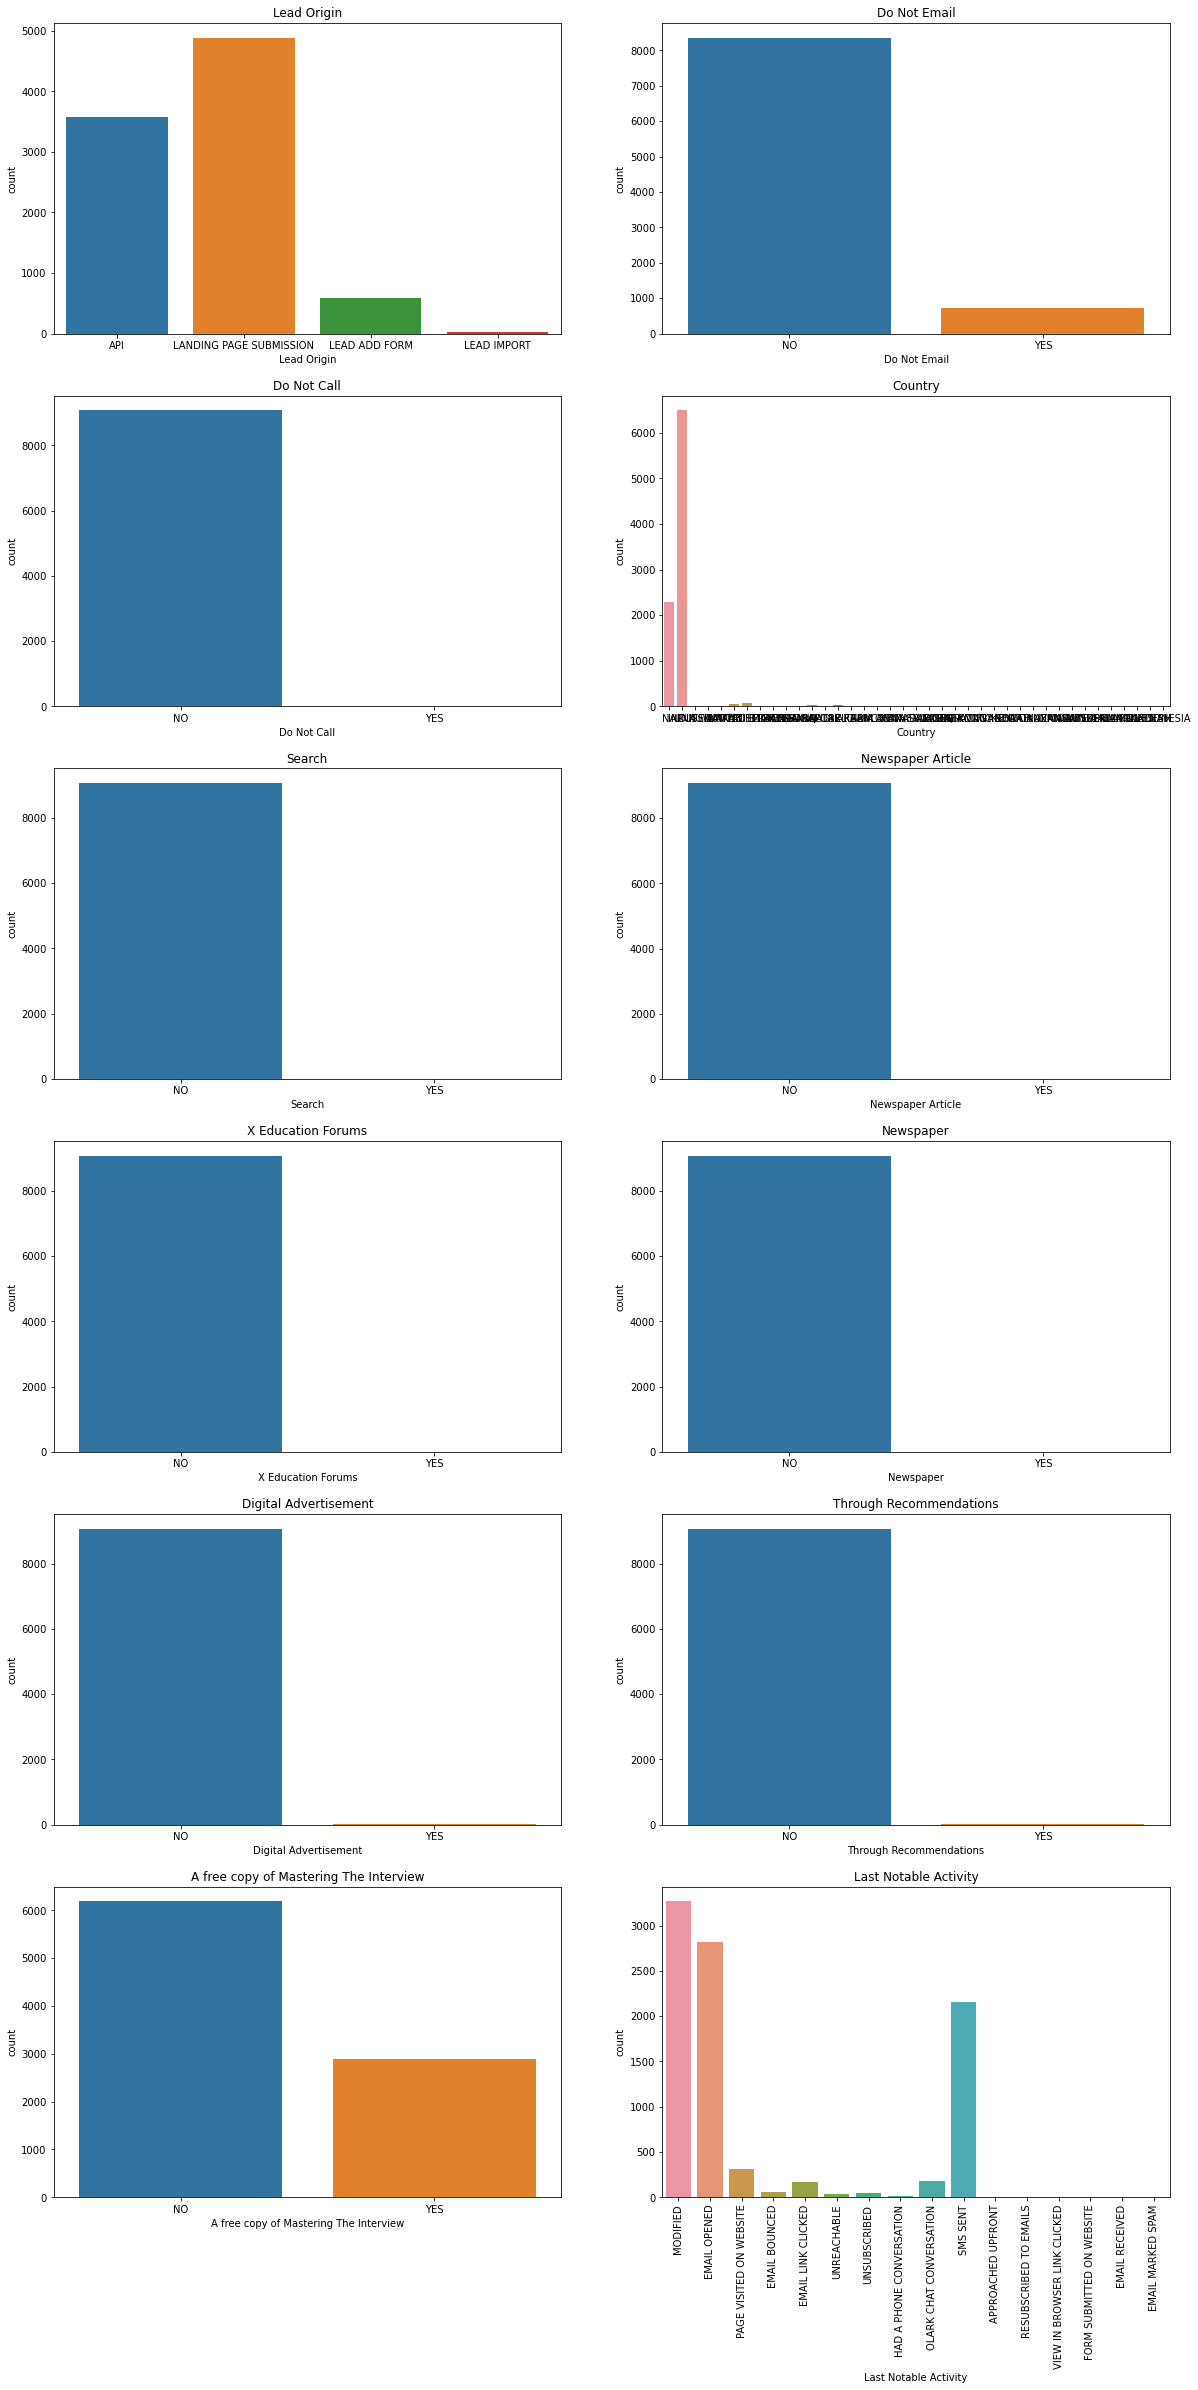

In [201]:
plt.figure(figsize = (20,40))

plt.subplot(6,2,1)
sns.countplot(df['Lead Origin'])
plt.title('Lead Origin')

plt.subplot(6,2,2)
sns.countplot(df['Do Not Email'])
plt.title('Do Not Email')

plt.subplot(6,2,3)
sns.countplot(df['Do Not Call'])
plt.title('Do Not Call')

plt.subplot(6,2,4)
sns.countplot(df['Country'])
plt.title('Country')

plt.subplot(6,2,5)
sns.countplot(df['Search'])
plt.title('Search')

plt.subplot(6,2,6)
sns.countplot(df['Newspaper Article'])
plt.title('Newspaper Article')

plt.subplot(6,2,7)
sns.countplot(df['X Education Forums'])
plt.title('X Education Forums')

plt.subplot(6,2,8)
sns.countplot(df['Newspaper'])
plt.title('Newspaper')

plt.subplot(6,2,9)
sns.countplot(df['Digital Advertisement'])
plt.title('Digital Advertisement')

plt.subplot(6,2,10)
sns.countplot(df['Through Recommendations'])
plt.title('Through Recommendations')

plt.subplot(6,2,11)
sns.countplot(df['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')

plt.subplot(6,2,12)
sns.countplot(df['Last Notable Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')


plt.show()

c:\Program Files\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


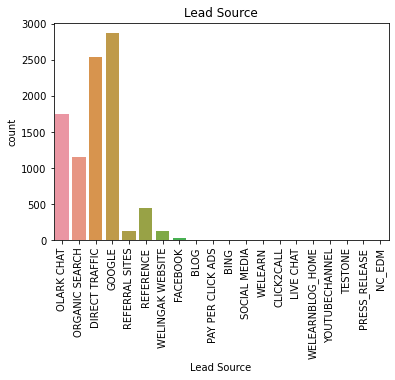

In [202]:
sns.countplot(df['Lead Source']).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

c:\Program Files\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Program Files\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Program Files\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Program Files\Anaconda\li

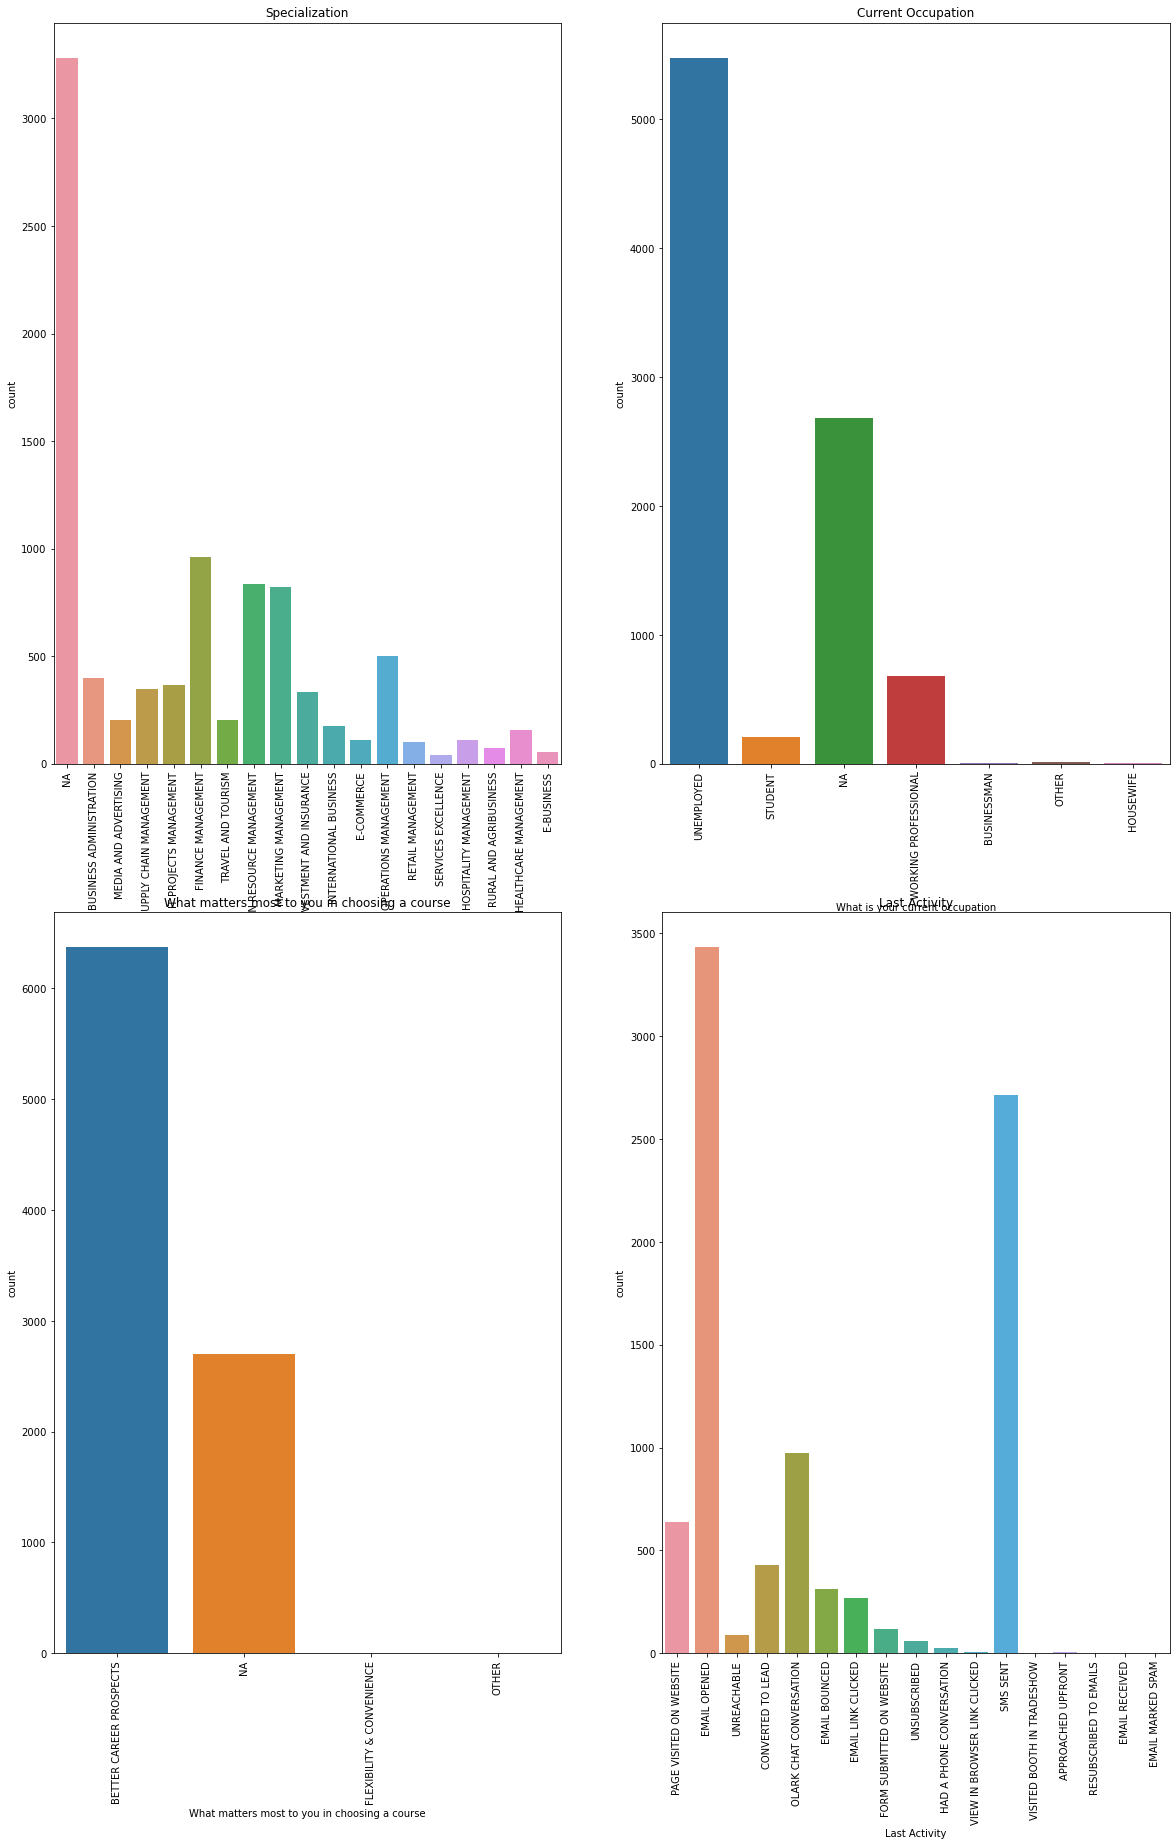

In [203]:
plt.figure(figsize = (20,30))
plt.subplot(2,2,1)
sns.countplot(df['Specialization']).tick_params(axis='x', rotation = 90)
plt.title('Specialization')
plt.subplot(2,2,2)
sns.countplot(df['What is your current occupation']).tick_params(axis='x', rotation = 90)
plt.title('Current Occupation')
plt.subplot(2,2,3)
sns.countplot(df['What matters most to you in choosing a course']).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')
plt.subplot(2,2,4)
sns.countplot(df['Last Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')
plt.show()

c:\Program Files\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


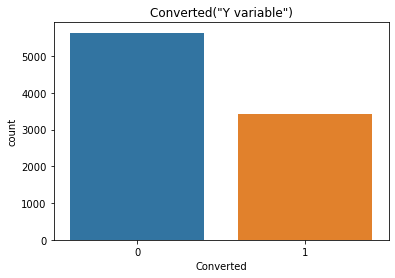

In [204]:
sns.countplot(df['Converted'])
plt.title('Converted("Y variable")')
plt.show()

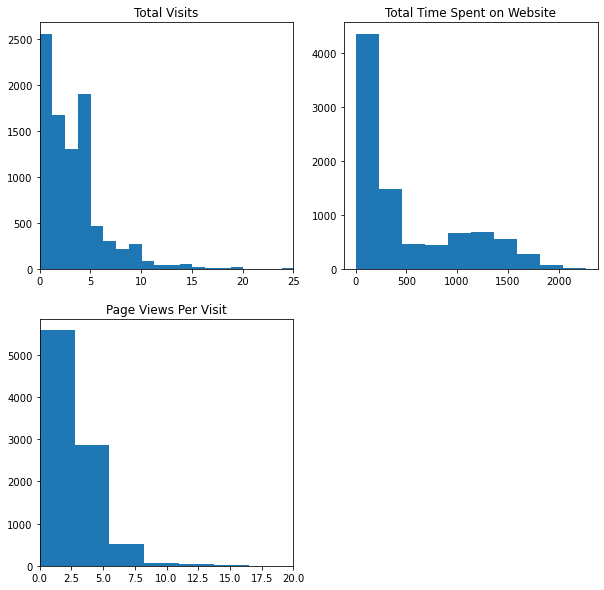

In [205]:
plt.figure(figsize = (10,10))
plt.subplot(221)
plt.hist(df['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(df['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(df['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

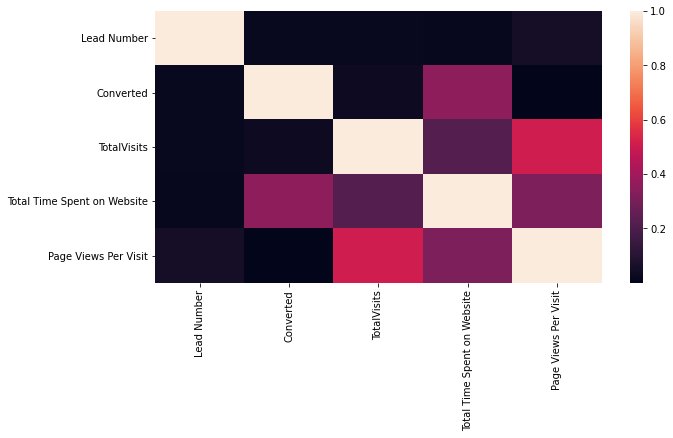

In [206]:
# To check the correlation among varibles
plt.figure(figsize=(10,5))
sns.heatmap(df.corr())
plt.show()

In [207]:
# Drop prospect Id as this is the PK of the DF
df = df.drop('Prospect ID',1)

In [208]:
# Create dummy variables for categorical variable
categorical_var = df.loc[:, df.dtypes == 'object'].columns
dummy = pd.get_dummies(df[categorical_var], drop_first=True)
df_dummy = pd.concat([df, dummy], axis=1)
df_dummy

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_FORM SUBMITTED ON WEBSITE,Last Notable Activity_HAD A PHONE CONVERSATION,Last Notable Activity_MODIFIED,Last Notable Activity_OLARK CHAT CONVERSATION,Last Notable Activity_PAGE VISITED ON WEBSITE,Last Notable Activity_RESUBSCRIBED TO EMAILS,Last Notable Activity_SMS SENT,Last Notable Activity_UNREACHABLE,Last Notable Activity_UNSUBSCRIBED,Last Notable Activity_VIEW IN BROWSER LINK CLICKED
0,660737,API,OLARK CHAT,NO,NO,0,0.0,0,0.00,PAGE VISITED ON WEBSITE,...,0,0,1,0,0,0,0,0,0,0
1,660728,API,ORGANIC SEARCH,NO,NO,0,5.0,674,2.50,EMAIL OPENED,...,0,0,0,0,0,0,0,0,0,0
2,660727,LANDING PAGE SUBMISSION,DIRECT TRAFFIC,NO,NO,1,2.0,1532,2.00,EMAIL OPENED,...,0,0,0,0,0,0,0,0,0,0
3,660719,LANDING PAGE SUBMISSION,DIRECT TRAFFIC,NO,NO,0,1.0,305,1.00,UNREACHABLE,...,0,0,1,0,0,0,0,0,0,0
4,660681,LANDING PAGE SUBMISSION,GOOGLE,NO,NO,1,2.0,1428,1.00,CONVERTED TO LEAD,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,579564,LANDING PAGE SUBMISSION,DIRECT TRAFFIC,YES,NO,1,8.0,1845,2.67,EMAIL MARKED SPAM,...,0,0,0,0,0,0,0,0,0,0
9236,579546,LANDING PAGE SUBMISSION,DIRECT TRAFFIC,NO,NO,0,2.0,238,2.00,SMS SENT,...,0,0,0,0,0,0,1,0,0,0
9237,579545,LANDING PAGE SUBMISSION,DIRECT TRAFFIC,YES,NO,0,2.0,199,2.00,SMS SENT,...,0,0,0,0,0,0,1,0,0,0
9238,579538,LANDING PAGE SUBMISSION,GOOGLE,NO,NO,1,3.0,499,3.00,SMS SENT,...,0,0,0,0,0,0,1,0,0,0


In [209]:
# Remove categorical var as we have dummy var
df_dummy = df_dummy.drop(categorical_var, 1)
df_dummy

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_LANDING PAGE SUBMISSION,Lead Origin_LEAD ADD FORM,Lead Origin_LEAD IMPORT,Lead Source_BLOG,Lead Source_CLICK2CALL,...,Last Notable Activity_FORM SUBMITTED ON WEBSITE,Last Notable Activity_HAD A PHONE CONVERSATION,Last Notable Activity_MODIFIED,Last Notable Activity_OLARK CHAT CONVERSATION,Last Notable Activity_PAGE VISITED ON WEBSITE,Last Notable Activity_RESUBSCRIBED TO EMAILS,Last Notable Activity_SMS SENT,Last Notable Activity_UNREACHABLE,Last Notable Activity_UNSUBSCRIBED,Last Notable Activity_VIEW IN BROWSER LINK CLICKED
0,660737,0,0.0,0,0.00,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,660728,0,5.0,674,2.50,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,660727,1,2.0,1532,2.00,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,660719,0,1.0,305,1.00,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,660681,1,2.0,1428,1.00,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,579564,1,8.0,1845,2.67,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9236,579546,0,2.0,238,2.00,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9237,579545,0,2.0,199,2.00,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9238,579538,1,3.0,499,3.00,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


## Split data set into train test df

In [210]:
# X data set is the data set with no converted var and the y data set contain converted var which is the targeted variable
X = df_dummy.drop(['Converted'], 1)
y = df_dummy['Converted']

In [211]:
# Split the dataset into 70% train and 30% test  
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

In [212]:
# Scale the three numeric features
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

<ipython-input-212-c6653e9f3db7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
c:\Program Files\Anaconda\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_LANDING PAGE SUBMISSION,Lead Origin_LEAD ADD FORM,Lead Origin_LEAD IMPORT,Lead Source_BLOG,Lead Source_CLICK2CALL,Lead Source_DIRECT TRAFFIC,...,Last Notable Activity_FORM SUBMITTED ON WEBSITE,Last Notable Activity_HAD A PHONE CONVERSATION,Last Notable Activity_MODIFIED,Last Notable Activity_OLARK CHAT CONVERSATION,Last Notable Activity_PAGE VISITED ON WEBSITE,Last Notable Activity_RESUBSCRIBED TO EMAILS,Last Notable Activity_SMS SENT,Last Notable Activity_UNREACHABLE,Last Notable Activity_UNSUBSCRIBED,Last Notable Activity_VIEW IN BROWSER LINK CLICKED
1289,646334,0.014184,0.612676,0.083333,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3604,625970,0.000000,0.000000,0.000000,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5584,607128,0.042553,0.751761,0.250000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7679,590921,0.000000,0.000000,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7563,591639,0.014184,0.787852,0.083333,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


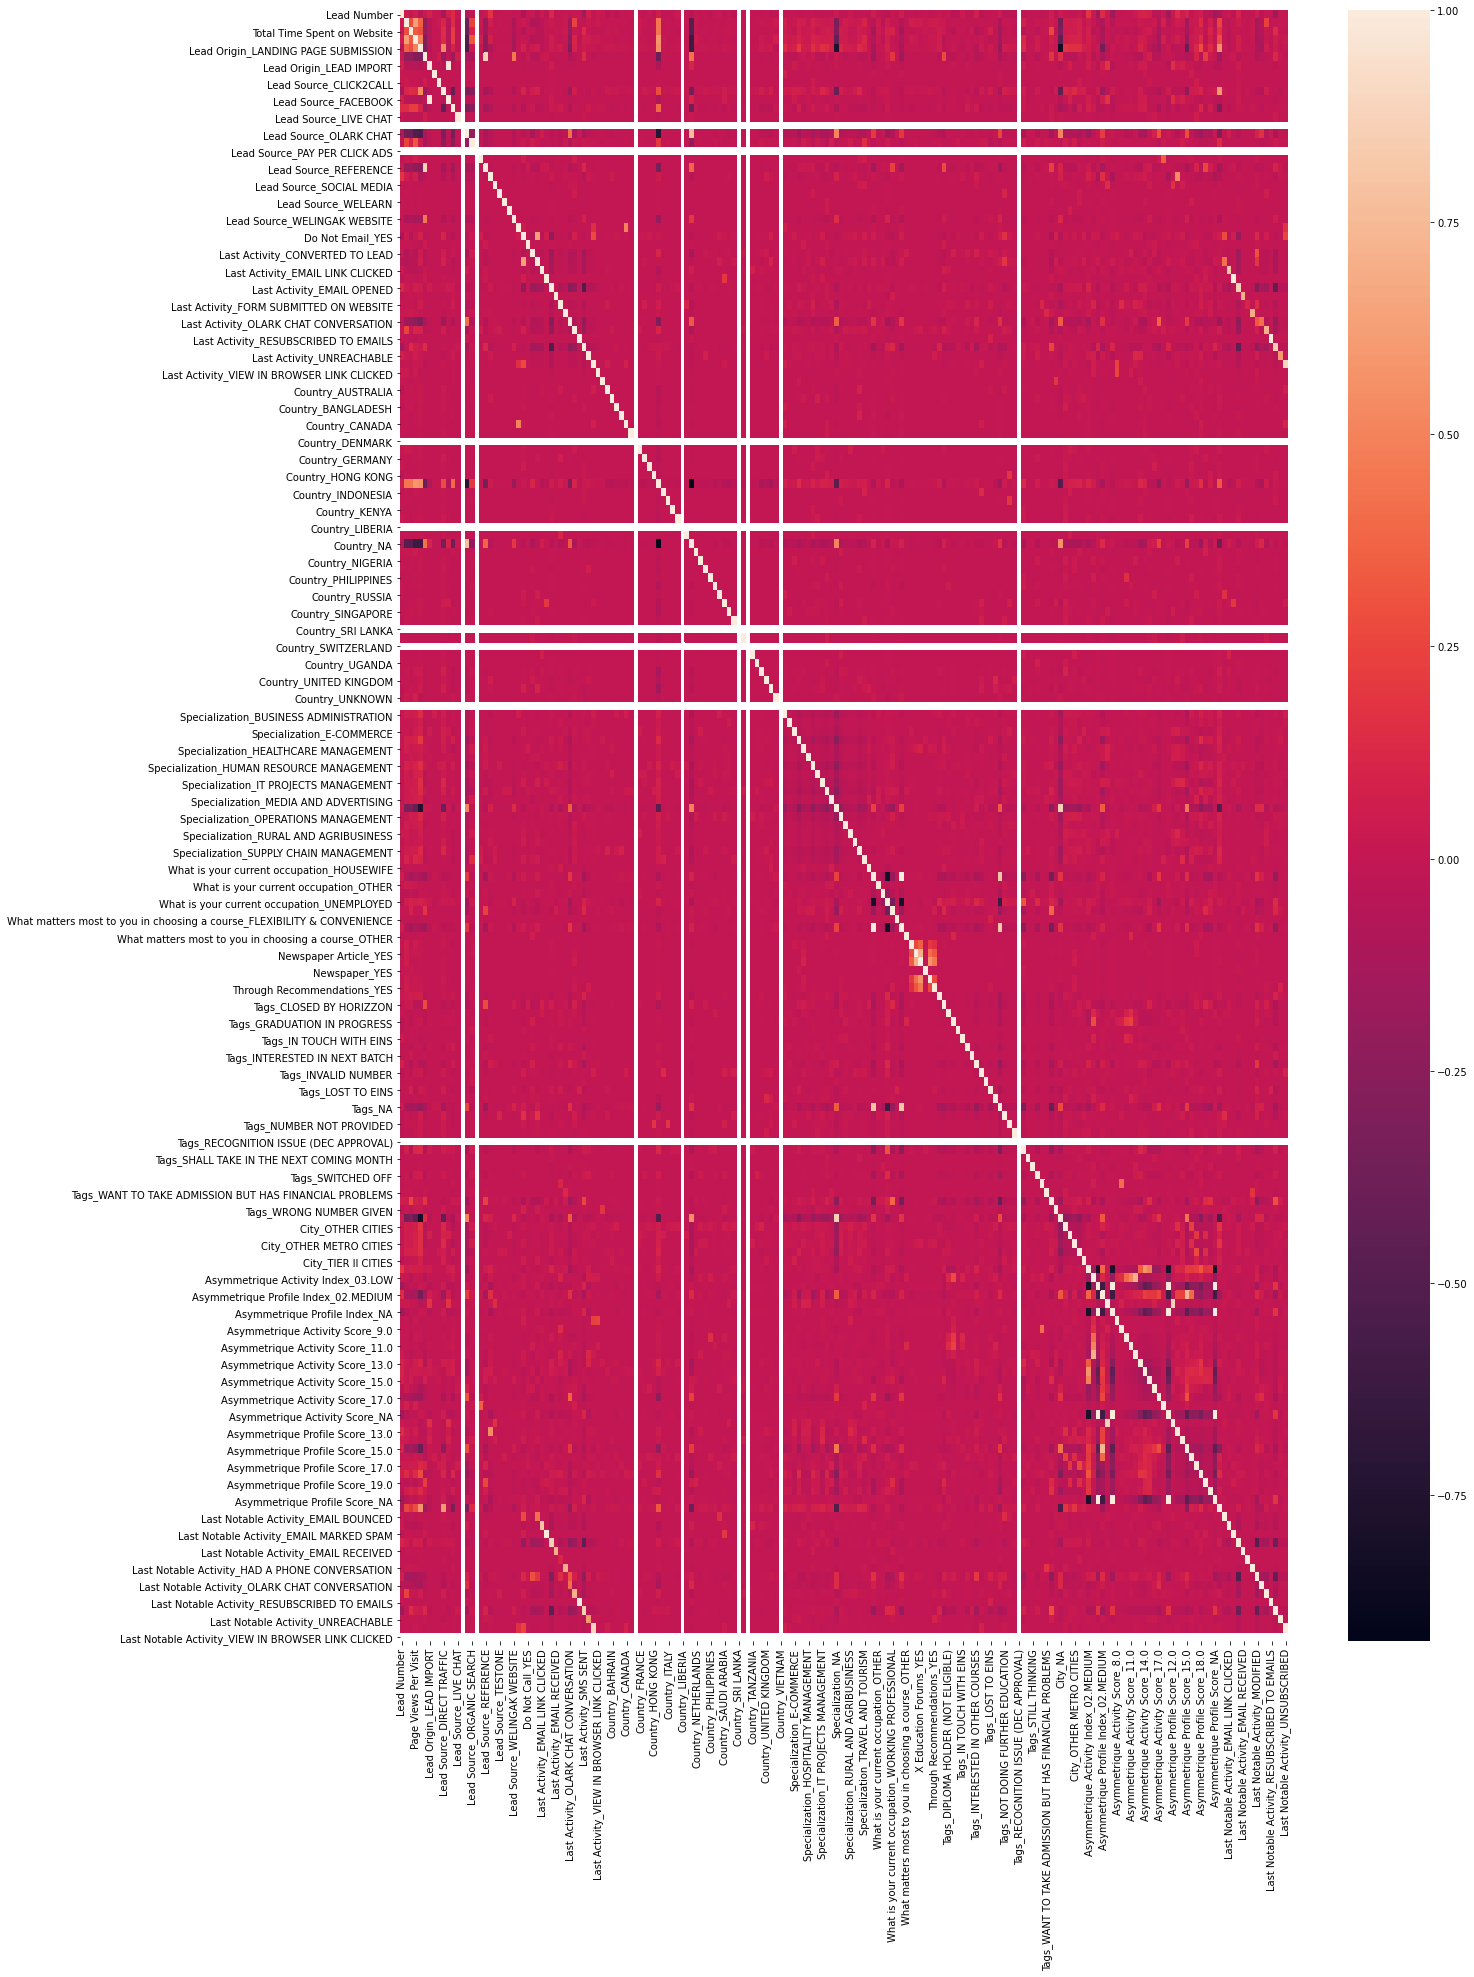

In [213]:
# To check the correlation among varibles
plt.figure(figsize=(20,30))
sns.heatmap(X_train.corr())
plt.show()

## Modelization 

In [214]:
# Running RFE
logreg = LogisticRegression()
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

c:\Program Files\Anaconda\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [215]:
# Selecting columns selected by RFE
X_train = X_train[X_train.columns[rfe.support_]]

In [216]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1644.3
Date:                Sat, 03 Jun 2023   Deviance:                       3288.6
Time:                        20:34:54   Pearson chi2:                 8.23e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -4.0526      1.231     -3.293      0.001      -6.465      -1.641
Lead Number                                           2.084e-06   1.99e-06      1.046      0.295   -1.82e-06    5.99e-06
Total Time Spent on Website                              4.0293      0.194     20.722      0.000       3.648       4.410
Lead Origin_LEAD ADD FORM                                3.6955      0.258     14.326      0.000       3.190       4.201
Last Activity_OLARK CHAT CONVERSATION                   -0.9843      0.204     -4.814      0.000      -1.385      -0.584
Last Activity_SMS SENT                                   0.8051      0.188      4.287      0.000       0.437       1.173
Specialization_NA                                        0.4013      0.104      3.842      0.000       0.197       0.606
What is your current occupation_NA                      20.7223   1.39e+04      0.001      0.999   -2.72e+04    2.72e+04
What is your current occupation_WORKING PROFESSIONAL     1.5524      0.266      5.830      0.000       1.030       2.074
What matters most to you in choosing a course_NA       -22.3685   1.39e+04     -0.002      0.999   -2.72e+04    2.72e+04
Tags_NA                                                  1.2979      0.144      8.983      0.000       1.015       1.581
Tags_RINGING                                            -3.2432      0.240    -13.488      0.000      -3.714      -2.772
Tags_WILL REVERT AFTER READING THE EMAIL                 4.3038      0.196     21.946      0.000       3.919       4.688
Asymmetrique Activity Score_15.0                         1.5266      0.125     12.246      0.000       1.282       1.771
Last Notable Activity_MODIFIED                          -0.5106      0.117     -4.362      0.000      -0.740      -0.281
Last Notable Activity_SMS SENT                           1.0029      0.222      4.519      0.000       0.568       1.438
========================================================================================================================
"""

In [217]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,What matters most to you in choosing a course_NA,174.76
6,What is your current occupation_NA,171.10
0,Lead Number,7.33
14,Last Notable Activity_SMS SENT,6.63
4,Last Activity_SMS SENT,6.39
9,Tags_NA,5.66
13,Last Notable Activity_MODIFIED,2.47
11,Tags_WILL REVERT AFTER READING THE EMAIL,2.34
1,Total Time Spent on Website,2.24
5,Specialization_NA,2.14


In [218]:
# VIF value of first 2 varables seems too high, so dropping it
X_train.drop(['What matters most to you in choosing a course_NA', 'What is your current occupation_NA'], axis = 1, inplace = True)

In [219]:
# Refit the model after dropping
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1716.7
Date:                Sat, 03 Jun 2023   Deviance:                       3433.5
Time:                        20:34:55   Pearson chi2:                 8.36e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.9182      1.192     -3.286      0.001      -6.255      -1.581
Lead Number                                           1.756e-06   1.93e-06      0.911      0.363   -2.02e-06    5.53e-06
Total Time Spent on Website                              4.0649      0.190     21.382      0.000       3.692       4.438
Lead Origin_LEAD ADD FORM                                3.9324      0.249     15.794      0.000       3.444       4.420
Last Activity_OLARK CHAT CONVERSATION                   -0.9432      0.198     -4.767      0.000      -1.331      -0.555
Last Activity_SMS SENT                                   0.7179      0.185      3.882      0.000       0.355       1.080
Specialization_NA                                        0.5407      0.101      5.372      0.000       0.343       0.738
What is your current occupation_WORKING PROFESSIONAL     1.6306      0.262      6.215      0.000       1.116       2.145
Tags_NA                                                  0.1082      0.100      1.085      0.278      -0.087       0.304
Tags_RINGING                                            -3.3306      0.245    -13.610      0.000      -3.810      -2.851
Tags_WILL REVERT AFTER READING THE EMAIL                 4.3701      0.197     22.191      0.000       3.984       4.756
Asymmetrique Activity Score_15.0                         1.6173      0.120     13.440      0.000       1.381       1.853
Last Notable Activity_MODIFIED                          -0.6796      0.114     -5.962      0.000      -0.903      -0.456
Last Notable Activity_SMS SENT                           1.1633      0.218      5.348      0.000       0.737       1.590
========================================================================================================================
"""

In [220]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Lead Number,7.27
12,Last Notable Activity_SMS SENT,6.59
4,Last Activity_SMS SENT,6.38
7,Tags_NA,2.52
11,Last Notable Activity_MODIFIED,2.44
9,Tags_WILL REVERT AFTER READING THE EMAIL,2.34
1,Total Time Spent on Website,2.23
5,Specialization_NA,2.11
8,Tags_RINGING,1.58
3,Last Activity_OLARK CHAT CONVERSATION,1.49


In [221]:
# Tags NA contain high p-value and also doesn't have a lot of meaning, so dropping it
X_train.drop('Tags_NA', axis = 1, inplace = True)

In [222]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1717.3
Date:                Sat, 03 Jun 2023   Deviance:                       3434.7
Time:                        20:34:57   Pearson chi2:                 8.27e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.9395      1.191     -3.307      0.001      -6.274      -1.605
Lead Number                                           1.877e-06   1.92e-06      0.976      0.329   -1.89e-06    5.65e-06
Total Time Spent on Website                              4.0632      0.190     21.379      0.000       3.691       4.436
Lead Origin_LEAD ADD FORM                                3.9051      0.247     15.785      0.000       3.420       4.390
Last Activity_OLARK CHAT CONVERSATION                   -0.9452      0.198     -4.777      0.000      -1.333      -0.557
Last Activity_SMS SENT                                   0.7399      0.184      4.019      0.000       0.379       1.101
Specialization_NA                                        0.5687      0.097      5.841      0.000       0.378       0.760
What is your current occupation_WORKING PROFESSIONAL     1.5991      0.260      6.148      0.000       1.089       2.109
Tags_RINGING                                            -3.3900      0.238    -14.220      0.000      -3.857      -2.923
Tags_WILL REVERT AFTER READING THE EMAIL                 4.3184      0.191     22.611      0.000       3.944       4.693
Asymmetrique Activity Score_15.0                         1.6165      0.120     13.445      0.000       1.381       1.852
Last Notable Activity_MODIFIED                          -0.6954      0.113     -6.148      0.000      -0.917      -0.474
Last Notable Activity_SMS SENT                           1.1452      0.217      5.278      0.000       0.720       1.571
========================================================================================================================
"""

In [223]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Last Notable Activity_SMS SENT,6.56
4,Last Activity_SMS SENT,6.32
0,Lead Number,5.31
10,Last Notable Activity_MODIFIED,2.40
1,Total Time Spent on Website,2.23
5,Specialization_NA,2.02
8,Tags_WILL REVERT AFTER READING THE EMAIL,1.93
3,Last Activity_OLARK CHAT CONVERSATION,1.49
6,What is your current occupation_WORKING PROFES...,1.29
7,Tags_RINGING,1.29


In [224]:
# After dropping all high-p and high-vif value, the lead number atributes still havent fit. So dropping it
X_train.drop('Lead Number', axis = 1, inplace = True)

In [225]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6339
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1717.8
Date:                Sat, 03 Jun 2023   Deviance:                       3435.6
Time:                        20:34:58   Pearson chi2:                 8.29e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.7824      0.104    -26.809      0.000      -2.986      -2.579
Total Time Spent on Website                              4.0702      0.190     21.426      0.000       3.698       4.443
Lead Origin_LEAD ADD FORM                                3.9039      0.247     15.802      0.000       3.420       4.388
Last Activity_OLARK CHAT CONVERSATION                   -0.9460      0.198     -4.788      0.000      -1.333      -0.559
Last Activity_SMS SENT                                   0.7367      0.184      4.002      0.000       0.376       1.097
Specialization_NA                                        0.5774      0.097      5.952      0.000       0.387       0.767
What is your current occupation_WORKING PROFESSIONAL     1.5937      0.260      6.130      0.000       1.084       2.103
Tags_RINGING                                            -3.4030      0.239    -14.256      0.000      -3.871      -2.935
Tags_WILL REVERT AFTER READING THE EMAIL                 4.3253      0.191     22.673      0.000       3.951       4.699
Asymmetrique Activity Score_15.0                         1.6168      0.120     13.462      0.000       1.381       1.852
Last Notable Activity_MODIFIED                          -0.6968      0.113     -6.163      0.000      -0.918      -0.475
Last Notable Activity_SMS SENT                           1.1283      0.216      5.217      0.000       0.704       1.552
========================================================================================================================
"""

In [226]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
10,Last Notable Activity_SMS SENT,6.40
3,Last Activity_SMS SENT,6.31
9,Last Notable Activity_MODIFIED,1.92
7,Tags_WILL REVERT AFTER READING THE EMAIL,1.83
0,Total Time Spent on Website,1.71
4,Specialization_NA,1.58
2,Last Activity_OLARK CHAT CONVERSATION,1.49
5,What is your current occupation_WORKING PROFES...,1.29
1,Lead Origin_LEAD ADD FORM,1.22
8,Asymmetrique Activity Score_15.0,1.20


## Model Prediction

In [227]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1289    0.790541
3604    0.099303
5584    0.568924
7679    0.099303
7563    0.793216
7978    0.998880
7780    0.845136
7863    0.845390
838     0.978762
708     0.773414
dtype: float64

In [228]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.79054102, 0.09930278, 0.56892372, 0.09930278, 0.79321591,
       0.9988795 , 0.8451356 , 0.84539012, 0.9787618 , 0.77341383])

In [229]:
y_train_pred_final = pd.DataFrame({'converted':y_train.values, 'conversion_probability':y_train_pred})

### Find cut-off value for probability

In [230]:
auc_score = metrics.roc_auc_score(y_train_pred_final.converted, y_train_pred_final.conversion_probability)
auc_score


0.9475618118944776

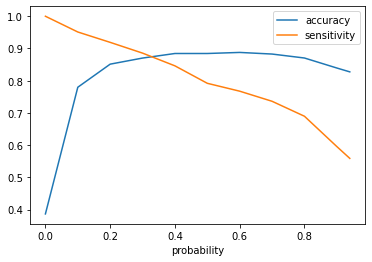

In [231]:
# Getting accuracy matrix for cut-off under 0.94
cut_off_value = [.0, .1, .2, .3, .4, .5, .6, .7, .8, .9, .94]
for i in cut_off_value:
    y_train_pred_final[i]= y_train_pred_final.conversion_probability.map(lambda x: 1 if x > i else 0)

cut_off_df = pd.DataFrame(columns = ['probability','accuracy','sensitivity'])
for i in cut_off_value:
    cm1 = metrics.confusion_matrix(y_train_pred_final.converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1  
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cut_off_df.loc[i] =[ i ,accuracy,sensitivity]
    
cut_off_df.plot.line(x='probability', y=['accuracy','sensitivity'])
plt.show()
    

### Cut off value should be best at 0.3

In [232]:
y_train_pred_final['predict'] = y_train_pred_final.conversion_probability.map( lambda x: 1 if x > 0.3 else 0)

In [233]:
metrics.accuracy_score(y_train_pred_final.converted, y_train_pred_final.predict)

0.87025665249567

### Model have around 0.87 accuracy

## Prediction

In [234]:
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

<ipython-input-234-d0e3d45aab65>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
c:\Program Files\Anaconda\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [235]:
col = X_train.columns

In [236]:
X_test = X_test[col]
X_test_sm = sm.add_constant(X_test[col])

In [237]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
y_pred_df = pd.DataFrame(y_test_pred)
y_test_df = pd.DataFrame(y_test)
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
y_pred_final= y_pred_final.rename(columns = {0 : 'conversion_probability'})
y_pred_final.head()

,Converted,conversion_probability
0,0,0.143979
1,1,0.993353
2,1,0.964964
3,1,0.831211
4,0,0.059475


In [238]:
y_pred_final['predict'] = y_pred_final.conversion_probability.map(lambda x: 1 if x > 0.3 else 0)
y_pred_final

,Converted,conversion_probability,predict
0,0,0.143979,0
1,1,0.993353,1
2,1,0.964964,1
3,1,0.831211,1
4,0,0.059475,0
...,...,...,...
2718,1,0.475035,1
2719,0,0.372831,1
2720,0,0.099303,0
2721,1,0.994906,1


In [239]:
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.predict)

0.8586118251928021

### Model still have 85% accuracy

In [240]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.predict)

In [241]:
TP = confusion2[1,1]
TN = confusion2[0,0]
FP = confusion2[0,1] 
FN = confusion2[1,0]

In [242]:
sensitivity = TP/(TP+FN)
sensitivity

0.8835546475995915

In [243]:
# Calculating the specificity
specificity = TN/(TN+FP)

## Conclusion
After running the model on test data these are the summary of the model:

Accuracy : 85.86%
Sensitivity :88.35%
Specificity : 84.46%

Based on the above result, this model seems to be good.

Important features responsible for good conversion rate or the ones' which contributes more towards the probability of a lead getting converted are:
Total Time Spent on Website	
Lead Origin_LEAD ADD FORM
Tags_RINGING
Tags_WILL REVERT AFTER READING THE EMAIL